# First Notebook

## Beginning imports just to review data.

In [16]:
import numpy as np
import os
# from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.cluster import MiniBatchKMeans
import pandas as pd

Code from [Intel Image Classification (CNN - Keras)](https://www.kaggle.com/vincee/intel-image-classification-cnn-keras) to properly import images into numpy arrays.

In [3]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

image_class = {}
for i, j in enumerate(class_names):
    image_class[i] = j

In [4]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['../phase_4/seg_train/seg_train', '../phase_4/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading ../phase_4/seg_train/seg_train


100%|██████████| 2382/2382 [00:25<00:00, 92.74it/s] 


Loading ../phase_4/seg_test/seg_test


100%|██████████| 501/501 [00:05<00:00, 98.10it/s] 


In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


Checking Class imbalance

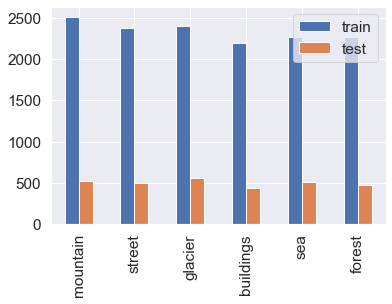

In [7]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

Quick function to visualize the images.

In [8]:
def Show_image(ImageNumber):
    ImageNumber = int(ImageNumber)   
    return display(image_class[train_labels[ImageNumber]].title(),array_to_img(train_images[ImageNumber]))

'Buildings'

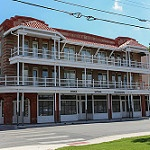

In [9]:
Show_image(2)

In [10]:
train_images.shape

(14034, 150, 150, 3)

In [11]:
test = train_images

In [ ]:
print(test.shape)
data_train = test / 255.0 # use 0...1 scale
data_train = data_train.reshape(14034, 150 * 150, 3)
print(data_train.shape)

In [ ]:
data_train[0]

#### Color Compression using KNN Clusting 

In [12]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

In [ ]:
# import warnings; warnings.simplefilter('ignore')  

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(4)
kmeans.fit(data_train[0])
new_colors = kmeans.cluster_centers_[kmeans.predict(data_train[0])]

plot_pixels(data_train[0], colors=new_colors,
            title="Reduced color space: 16 colors")

In [ ]:
test_recolored = new_colors.reshape(test[0].shape)

fig, ax = plt.subplots(1,2,figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(test[0].astype(int))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(test_recolored)
ax[1].set_title('16-color Image', size=16);

In [48]:
def color_compress_KNN(data, KNN=4):
    import warnings; warnings.simplefilter('ignore') 
    Kmeans_images = []
    data_train = data / 255.0 # use 0...1 scale
    data_train = data_train.reshape(data.shape[0], 150 * 150, 3)
    for i in tqdm(range(data_train.shape[0])):
        kmeans = MiniBatchKMeans(KNN)
        kmeans.fit(data_train[i])
        new_colors = None
        new_colors = kmeans.cluster_centers_[kmeans.predict(data_train[i])]
        new_image = new_colors.reshape(data[i].shape)
        Kmeans_images.append(new_image)
    print("Ding! Fries are done")
    return Kmeans_images

In [59]:
test_images.shape

(3000, 150, 150, 3)

### Saving images into Numpy Compressed files to be shared and loaded.

In [80]:
# clusted_images_train = color_compress_KNN(train_images)

100%|██████████| 14034/14034 [35:28<00:00,  6.59it/s] 


Ding! Fries are done


In [60]:
# clusted_images_test = color_compress_KNN(test_images)

100%|██████████| 3000/3000 [06:58<00:00,  7.17it/s]


Ding! Fries are done


In [87]:
# np.savez("clusted_images_train",args=clusted_images_train)

In [88]:
# np.savez("clusted_images_test",args=clusted_images_test)

In [6]:
# np.savez("train_labels",args=train_labels)

In [7]:
# np.savez("test_labels",args=test_labels)

Function to see the effect of Color Compression

In [64]:
def graph_before_and_after(data_pre, data_after, Image_num):
    fig, ax = plt.subplots(1,2,figsize=(16, 6),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(data_pre[Image_num].astype(int))
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(data_after[Image_num])
    ax[1].set_title('16-color Image', size=16);

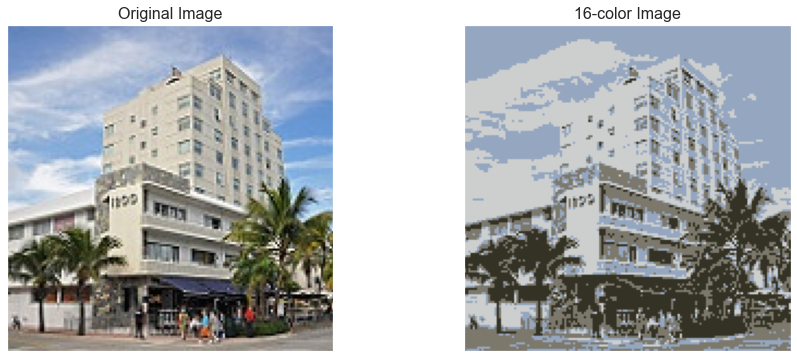

In [77]:
graph_before_and_after(train_images,images_new, 6)

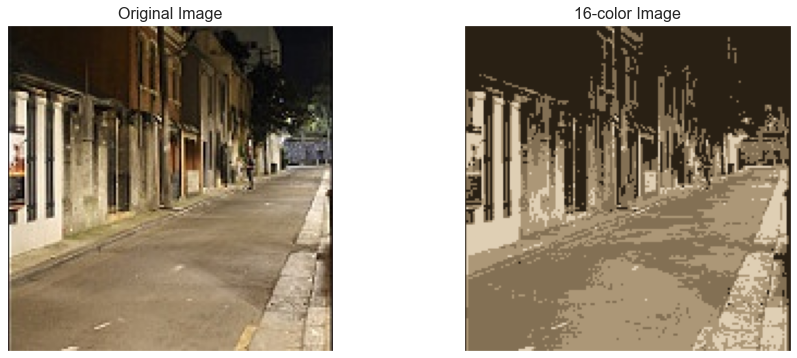

In [79]:
graph_before_and_after(test_images, clusted_images_test, 2999)

Color Hist Feature engineering? {https://gogul.dev/software/image-classification-python}

In [110]:
# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None, bins=8):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

(0.0, 256.0)

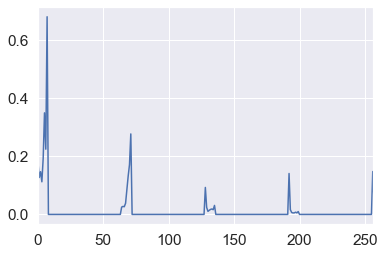

In [115]:
image = fd_histogram(train_images[500])
plt.plot(image)
plt.xlim([0, 256])